In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.13.0


In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(real_data, prediction):
    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f}".format(
        mean_absolute_error(real_data, prediction), 
        mean_squared_error(real_data, prediction)**0.5, 
        r2_score(real_data, prediction)))

## Регрессия

In [4]:
df = pd.read_csv("house_price.csv")
df = df.set_index('id')
df

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
id,,,,,,,,,,,,,,,,,,,,,
896,2,0,46.0,3,5,0,0,0,0,1,...,2,3,0,7,3,13,2,7,18,2350000.0
399,2,0,44.6,5,5,0,0,0,0,1,...,3,5,0,7,3,11,1,4,11,1799000.0
1515,2,0,53.0,1,9,0,1,0,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
1216,2,0,64.0,4,5,0,0,0,1,0,...,31,5,1,55,2,10,28,32,17,3970000.0
677,1,0,33.3,1,10,0,0,1,0,0,...,1,3,0,2,3,9,0,3,6,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1,0,38.0,6,9,0,0,0,0,1,...,2,0,0,2,0,8,0,3,5,1700000.0
562,3,0,46.0,4,4,1,0,0,0,1,...,45,8,1,19,3,13,4,10,17,2400000.0
407,1,0,34.0,9,16,0,0,0,0,1,...,0,0,0,0,1,5,1,0,3,1950000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 896 to 458
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  
 1

In [6]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,-0.039783,-0.206351,-0.241288,-0.504138,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-0.514603,-0.379971,-0.087812,0.305051,-0.034901,-0.361191,0.035673,0.561748,-0.318570
1,-0.039783,-0.206351,-0.311941,0.027989,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.479121,0.100030,-0.379971,-0.087812,0.305051,-0.299690,-0.529207,-0.401052,-0.306352,-0.821407
2,-0.039783,-0.206351,0.111976,-1.036265,0.013544,-0.407364,2.975510,-0.159313,-0.336077,-1.841549,...,-0.414134,1.943928,-0.379971,-0.310582,0.305051,0.494677,-0.193176,0.035673,0.189705,0.092096
3,-0.039783,-0.206351,0.667104,-0.238074,-0.828280,-0.407364,-0.336077,-0.159313,2.975510,-1.841549,...,1.340526,0.100030,2.266721,5.258657,-0.306565,-0.432085,4.007208,3.675047,0.437734,1.159827
4,-1.044311,-0.206351,-0.882209,-1.036265,0.224000,-0.407364,-0.336077,6.276942,-0.336077,-1.841549,...,-0.609096,-0.514603,-0.379971,-0.644736,0.305051,-0.564479,-0.697222,-0.546627,-0.926424,-0.747487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,-1.044311,-0.206351,-0.645018,0.294053,0.013544,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-1.436552,-0.379971,-0.644736,-1.529797,-0.696874,-0.697222,-0.546627,-1.050438,-0.911754
804,0.964744,-0.206351,-0.241288,-0.238074,-1.038737,2.454809,-0.336077,-0.159313,-0.336077,0.543021,...,2.250349,1.021979,2.266721,1.248805,0.305051,-0.034901,-0.025161,0.472398,0.437734,-0.272940
805,-1.044311,-0.206351,-0.846883,1.092244,1.486737,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.674083,-1.436552,-0.379971,-0.867505,-0.918181,-1.094057,-0.529207,-0.983352,-1.298467,-0.683606
806,-0.039783,-0.206351,-0.241288,-1.036265,-0.828280,2.454809,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,0.100030,-0.379971,-0.087812,0.305051,-0.299690,-0.361191,-0.255477,0.065691,-0.272940


In [7]:
X = df_scaled.copy()
y = X.pop('Цена')

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [9]:
model = Sequential()
model.add(Dense(units=200, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8865 - val_loss: 0.4915
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3316 - val_loss: 0.2812
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1697 - val_loss: 0.2255
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1096 - val_loss: 0.2051
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0924 - val_loss: 0.1790
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0784 - val_loss: 0.1682
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0649 - val_loss: 0.1586
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0575 - val_loss: 0.1636
Epoch 9/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0475 - val_loss: 0.1448
Epoch 10/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0434 - val_loss: 0.1371
Epoch 11/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_loss: 0.1404
Epoch 12/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_lo

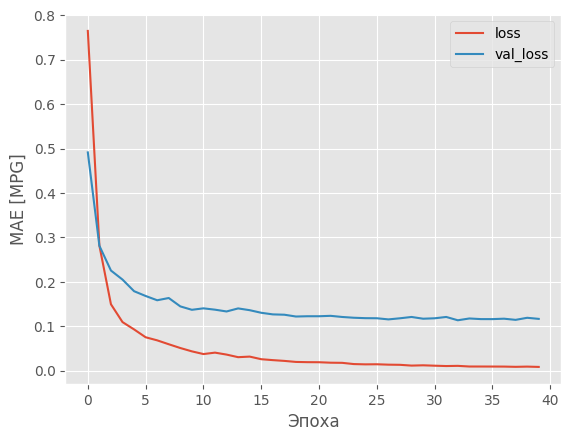

In [11]:
plot_loss(history)

In [13]:
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

predictions = model.predict(X_test)

calculate_metrics(y_test, predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.1143
Mean Squared Error: 0.10839257389307022
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
MAE:    0.25, RMSE:    0.33, R2:    0.90


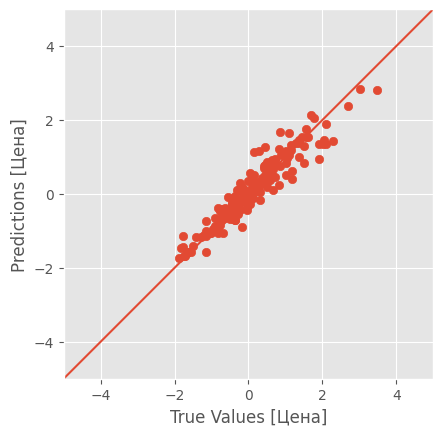

In [14]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values [Цена]')
plt.ylabel('Predictions [Цена]')
lims = [-5, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

## Классификация

In [15]:
df = pd.read_csv("telecom_churn.csv")    # Считываем файл csv
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [17]:
target = df['Churn']
y = target.replace(to_replace = [False, True], value = [0, 1])

df = df.drop(['Churn', 'State'], axis =1)
df = df.replace(to_replace=['Yes','No'], value=[1,0])
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[ 0.676, -0.524, -0.328, ..., -0.601, -0.086, -0.428],
       [ 0.149, -0.524, -0.328, ..., -0.601,  1.241, -0.428],
       [ 0.903, -0.524, -0.328, ...,  0.212,  0.697, -1.188],
       ...,
       [-1.835,  1.719, -0.328, ...,  0.618,  1.387,  0.332],
       [ 2.083,  1.719,  3.053, ...,  2.243, -1.877,  0.332],
       [-0.68 , -0.524, -0.328, ..., -0.195,  1.241, -1.188]])

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

In [21]:
model = Sequential()
model.add(Dense(units=20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

predictions = model.predict(X_test)

predictions

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6258 - loss: 0.2279 - val_accuracy: 0.8618 - val_loss: 0.1429
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.1315 - val_accuracy: 0.8595 - val_loss: 0.1232
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.1227 - val_accuracy: 0.8571 - val_loss: 0.1149
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.1055 - val_accuracy: 0.8618 - val_loss: 0.1086
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.0954 - val_accuracy: 0.8665 - val_loss: 0.1029
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.0921 - val_accuracy: 0.8759 - val_loss: 0.0983
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.0756 - val_accuracy: 0.8852 - val_loss: 0.0942
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8838 - loss: 0.0847 - val_accuracy: 0.8876 - val_loss:

array([[0.048],
       [0.056],
       [0.084],
       [0.015],
       [0.005],
       [0.36 ],
       [0.025],
       [0.011],
       [0.728],
       [0.028],
       [0.045],
       [0.04 ],
       [0.045],
       [0.1  ],
       [0.041],
       [0.004],
       [0.156],
       [0.004],
       [0.012],
       [0.117],
       [0.144],
       [0.018],
       [0.004],
       [0.005],
       [0.03 ],
       [0.003],
       [0.056],
       [0.335],
       [0.023],
       [0.048],
       [0.152],
       [0.036],
       [0.002],
       [0.003],
       [0.042],
       [0.039],
       [0.039],
       [0.022],
       [0.714],
       [0.028],
       [0.048],
       [0.012],
       [0.015],
       [0.668],
       [0.007],
       [0.828],
       [0.044],
       [0.18 ],
       [0.094],
       [0.966],
       [0.926],
       [0.003],
       [0.207],
       [0.006],
       [0.064],
       [0.04 ],
       [0.005],
       [0.037],
       [0.013],
       [0.015],
       [0.008],
       [0.033],
       [

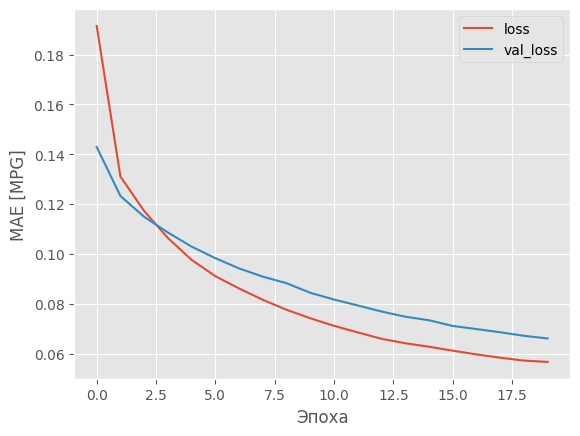

In [22]:
plot_loss(history)

In [23]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
print('Test accuracy: ', accuracy_score(y_test, predictions > 0.5))
print('Test F measure: ', f1_score(y_test, predictions > 0.5))
print('Test recall_score: ', recall_score(y_test, predictions > 0.5))
print('precision score: ', precision_score(y_test, predictions > 0.5))

Test accuracy:  0.9055472263868066
Test F measure:  0.6227544910179641
Test recall_score:  0.5306122448979592
precision score:  0.7536231884057971


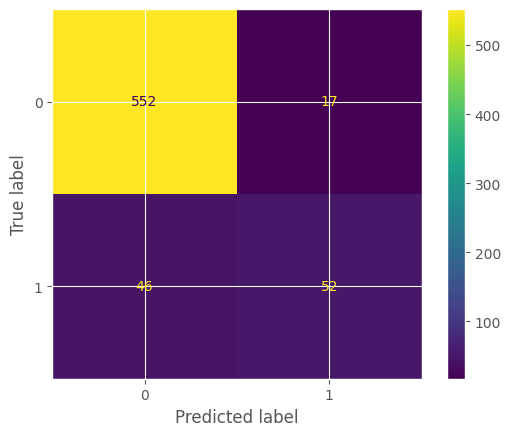

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions > 0.5)
ConfusionMatrixDisplay(cm).plot()
plt.show()